# (Exploration and Visualization of Prosper loans)

## Patrick Ojunde

<!-- ## Preliminary Wrangling
 -->
## Table of Contents
<ul>
<li><a href="#introduce">Introduction</a></li>
<li><a href="#obj">Objective</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#uni">Univariate exploration</a></li>
<li><a href="#bi">Bivariate exploration</a></li> 
<li><a href="#multi">Multivariate exploration</a></li>
<li><a href="#insights">Analysis Summary & Insights</a></li>  
<li><a href="#conclude">Conclusions</a></li>
</ul>

<a id='introduce'></a>

### Introduction

> The dataset is composed of  113,937 rows (uniquely idenifying a loan) and 81 variables that describes each loan some of which includes loan amount, borrower rate (or interest rate), current loan status, and borrower income.

> More information about this dataset can be found here: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0


<a id='obj'></a>
    
### Objective
    
> The objective of this analysis and visualization activity is to come up with interesting and actionable insghts from the loan data

> We also want to identify what featrues are suitable for predicting the success of a loan application

>> Importing required libraries

In [126]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<!-- > Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section. -->

In [127]:
df_main = pd.read_csv('prosperLoanData.csv')

In [128]:
df_main.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


<!-- ### What is the structure of your dataset? -->

### Exlpore qualitative and quantitive features of datasets

In [129]:
rows= df_main.shape[0]
columns = df_main.shape[1]
print(f'No of Rows: {rows}\nNo of Columns: {columns}')

No of Rows: 113937
No of Columns: 81


> Let us firstly have a look at our columns and determine which ones ware suitable for the objective of this analysis

In [130]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

> Not all the data features are useful for our analysis, so we would work with the following `23 features`

In [131]:
features_to_use = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

> select the useful columns from the main dataframe

In [132]:
df_loan = df_main[features_to_use]
df_loan.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,36,Completed,NaN,0.16516,0.1580,NaN,NaN,NaN,0,Self-employed,...,True,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",258,CO
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
2,36,Completed,NaN,0.28269,0.2750,NaN,NaN,NaN,0,Not available,...,True,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,41,GA
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN


> Let perform some assement of the selcted features

In [133]:
rows = df_loan.shape[0]
cols= df_loan.shape[1]
print(f'New Row Size: {rows}\nNew Column Size {cols}')

New Row Size: 113937
New Column Size 23


In [134]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   EstimatedEffectiveYield    84853 non-null   float64
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeVerifiable           11

In [135]:
df_loan.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


In [136]:
df_loan.isnull().sum()

Term                             0
LoanStatus                       0
EstimatedEffectiveYield      29084
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
Occupation                    3588
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
IncomeVerifiable                 0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
Recommendations                  0
DebtToIncomeRatio             8554
LoanOriginalAmount               0
PercentFunded                    0
IncomeRange                      0
Investors                        0
BorrowerState                 5515
dtype: int64

.

### Data Wrangling

Define 
>There are  null values in our datasets

> We cannot work with large amounts of null values in our dataset, wo we would drop them 

Code

In [137]:
df_loan = df_loan.dropna()

Test

> Test there are no more null values
>> If there are no more null values, the code below should output zero

In [138]:
df_loan.isnull().all().sum()

0

> Now let's check if our dataset contain deuplicate values
>> If there are no duplicates, the code below should output zero

In [139]:
df_loan.duplicated().sum()

0

Define
> There is inappropriate naming of some of the features, we would have to rename them 

Code

In [140]:
columns_to_rename ={'ProsperRating (Alpha)': 'prosperAlphaRating', 
                        'ProsperRating (numeric)': 'prosperNumericRating',
                        'ListingCategory (numeric)' : 'listingCategoryNumeric'
                       }

In [141]:
df_loan = df_loan.rename(columns=columns_to_rename)

Test

In [142]:
old_cols = ['ProsperRating (Alpha)','ProsperRating (numeric)','ListingCategory (numeric)']
for i in old_cols:
    assert i not in df_loan.columns.to_list()
    print(i + 'does not exist')

ProsperRating (Alpha)does not exist
ProsperRating (numeric)does not exist
ListingCategory (numeric)does not exist


> We also need to make all our column names lowercase and separated by _

In [143]:
# lower case all variable names
df_loan.columns = df_loan.columns.str.replace('[\W]', '')\
          .str.replace('(?<!^)([A-Z])', r'_\1')\
          .str.lower()

> Confirm all our columns are well formatted

In [144]:
df_loan.columns

Index(['term', 'loan_status', 'estimated_effective_yield', 'borrower_a_p_r',
       'borrower_rate', 'prosper_numeric_rating', 'prosper_alpha_rating',
       'prosper_score', 'listing_category_numeric', 'employment_status',
       'occupation', 'employment_status_duration', 'is_borrower_homeowner',
       'income_verifiable', 'stated_monthly_income', 'monthly_loan_payment',
       'recommendations', 'debt_to_income_ratio', 'loan_original_amount',
       'percent_funded', 'income_range', 'investors', 'borrower_state'],
      dtype='object')

> Let's check our data types
>> We need to be sure our features have the correct data types

In [146]:
df_loan.dtypes

term                            int64
loan_status                    object
estimated_effective_yield     float64
borrower_a_p_r                float64
borrower_rate                 float64
prosper_numeric_rating        float64
prosper_alpha_rating           object
prosper_score                 float64
listing_category_numeric        int64
employment_status              object
occupation                     object
employment_status_duration    float64
is_borrower_homeowner            bool
income_verifiable                bool
stated_monthly_income         float64
monthly_loan_payment          float64
recommendations                 int64
debt_to_income_ratio          float64
loan_original_amount            int64
percent_funded                float64
income_range                   object
investors                       int64
borrower_state                 object
dtype: object

> From the document that contains our varaible description, term should be treated a  asa categorialc variable

> We have to convert term to catgoricla datatype so we can construct visuals like bar chart/count plot on it

In [147]:
#convert term to  categorical variable
df_loan.term = df_loan.term.astype('category')

In [148]:
df_loan.dtypes

term                          category
loan_status                     object
estimated_effective_yield      float64
borrower_a_p_r                 float64
borrower_rate                  float64
prosper_numeric_rating         float64
prosper_alpha_rating            object
prosper_score                  float64
listing_category_numeric         int64
employment_status               object
occupation                      object
employment_status_duration     float64
is_borrower_homeowner             bool
income_verifiable                 bool
stated_monthly_income          float64
monthly_loan_payment           float64
recommendations                  int64
debt_to_income_ratio           float64
loan_original_amount             int64
percent_funded                 float64
income_range                    object
investors                        int64
borrower_state                  object
dtype: object

#### Objective Reminder: 

>Our primary focus in this analytic endeavour would be to understand what features are in our gathered & wrangled data are more reponsible for the succes of a loan application while gaining and visalizing othe valubale insights. 

> Based on the intmacy gained from the data, and further research on loan outcomes and loan predictors, primacy of analysis would be given to features which cover factors like 

>> -  borrowers income/employemnt status

>> - borrowers debt exposure

>> - borrowers asset (home owner in this instance)

>> - credit rating from the loan company

>> <a href='https://loans.usnews.com/articles/beyond-credit-scores-factors-that-affect-a-loan-application'> Reference</a>

## Exploratory Data Analysis

<a id = 'uni'><a/>
## Univariate Exploration

<!-- > In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables. -->

> Since Visualization according to data types, is braoadly categorical (qualitative) or numeric (quantitaitve) especially for univariate visualization, we shall be dividing our datasets into two namely:

  >> - categorical
  >> - numerical

<!-- > Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next. -->

categorical dataset

In [152]:
categ_loan = df_loan.loc[:, (df_loan.dtypes =='object') | (df_loan.dtypes =='category')]
categ_loan.head(10)

,term,loan_status,prosper_alpha_rating,employment_status,occupation,income_range,borrower_state
1,36,Current,A,Employed,Professional,"$50,000-74,999",CO
3,36,Current,A,Employed,Skilled Labor,"$25,000-49,999",GA
4,36,Current,D,Employed,Executive,"$100,000+",MN
5,60,Current,B,Employed,Professional,"$100,000+",NM
6,36,Current,E,Employed,Sales - Retail,"$25,000-49,999",KS
7,36,Current,C,Employed,Laborer,"$25,000-49,999",CA
8,36,Current,AA,Employed,Food Service,"$25,000-49,999",IL
9,36,Current,AA,Employed,Food Service,"$25,000-49,999",IL
10,60,Current,C,Employed,Fireman,"$75,000-99,999",MD
12,36,Past Due (1-15 days),B,Employed,Sales - Retail,"$25,000-49,999",AL


numerical dataset

In [154]:
numeric_loan = df_loan.loc[:, (df_loan.dtypes ==np.int64) | (df_loan.dtypes ==np.float64)]
numeric_loan

,estimated_effective_yield,borrower_a_p_r,borrower_rate,prosper_numeric_rating,prosper_score,listing_category_numeric,employment_status_duration,stated_monthly_income,monthly_loan_payment,recommendations,debt_to_income_ratio,loan_original_amount,percent_funded,investors
1,0.07960,0.12016,0.0920,6.0,7.0,2,44.0,6125.000000,318.93,0,0.18,10000,1.0,1
3,0.08490,0.12528,0.0974,6.0,9.0,16,113.0,2875.000000,321.45,0,0.15,10000,1.0,158
4,0.18316,0.24614,0.2085,3.0,4.0,2,44.0,9583.333333,563.97,0,0.26,15000,1.0,20
5,0.11567,0.15425,0.1314,5.0,10.0,1,82.0,8333.333333,342.37,0,0.36,15000,1.0,1
6,0.23820,0.31032,0.2712,2.0,2.0,1,172.0,2083.333333,122.67,0,0.27,3000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.16490,0.22354,0.1864,4.0,5.0,1,246.0,4333.333333,364.74,0,0.13,10000,1.0,1
113933,0.10070,0.13220,0.1110,6.0,8.0,7,21.0,8041.666667,65.57,0,0.11,2000,1.0,22
113934,0.18828,0.23984,0.2150,3.0,3.0,1,84.0,2875.000000,273.35,0,0.51,10000,1.0,119
113935,0.24450,0.28408,0.2605,4.0,5.0,2,94.0,3875.000000,449.55,0,0.48,15000,1.0,274


> Visualize the loan rating categories

<!-- ### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here! -->

In [156]:
alpha_rating_count = categ_loan.prosper_alpha_rating.value_counts()
alpha_rating_count

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: prosper_alpha_rating, dtype: int64

`NB:` The order of the rating has to be maintained in our visualization because thiis is an ordinal categorical data type

In [161]:
alpha_order = sorted(alpha_rating_count.index.tolist())
alpha_order

['A', 'AA', 'B', 'C', 'D', 'E', 'HR']

In [162]:
alpha_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [163]:
income_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

In [166]:
pd_version = pd.__version__.split(".")
pd_version

['1', '0', '1']

> Order Ordinal categorical datatypes in dataframe

In [178]:
if (int(pd_version[0]) > 0) or (int(pd_version[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = alpha_order)
    df_loan.prosper_alpha_rating = df_loan.prosper_alpha_rating.astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
    df_loan.income_range = df_loan.income_range.astype(vclasses_1)
else: # compatibility for v.20
    df_loan.prosper_alpha_rating = df_loan.prosper_alpha_rating.astype('category', ordered = True,
                                                     categories = alpha_order)
    df_loan.income_range = df_loan.income_range.astype('category', ordered = True,
                                                     categories = income_order)

> Plot Applicants Loan Ratings by Count

>> Define bar_colors for countplot ot barchart

In [184]:
bar_color = sb.color_palette()[0]

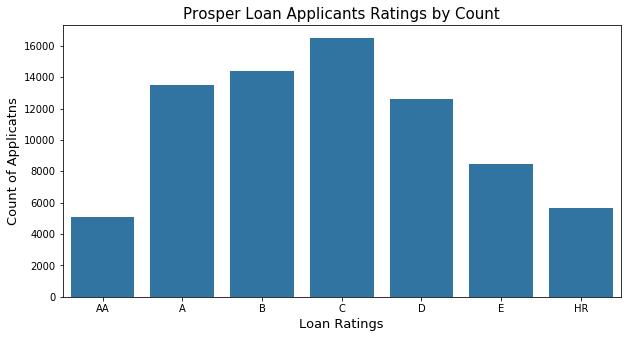

In [190]:
plt.figure(figsize = (10, 5))
sb.countplot(data = df_loan, x = 'prosper_alpha_rating', color = bar_color);
plt.title('Prosper Loan Applicants Ratings by Count', fontsize=15)
plt.xlabel('Loan Ratings',fontsize=13)
plt.ylabel('Count of Applicatns' ,fontsize=13)
plt.savefig(fname='visuals/loan_ratings.png', format='png')
plt.show()

> Plot Applicants Income Range by Count

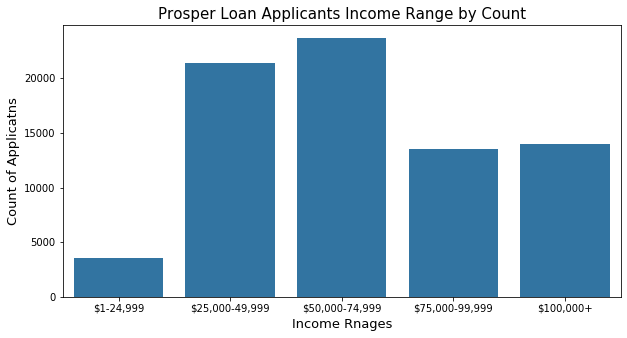

In [189]:
plt.figure(figsize = (10, 5)) 
sb.countplot(data = df_loan, x = 'income_range', color = bar_color);
plt.title('Prosper Loan Applicants Income Range by Count', fontsize=15)
plt.xlabel('Income Rnages',fontsize=13)
plt.ylabel('Count of Applicatns' ,fontsize=13)
plt.savefig(fname='visuals/income_ranges.png', format='png')
plt.show()

> Now let us plot the listing category from our numeric data

In [191]:
list_cat = numeric_loan.listing_category_numeric.value_counts()
list_cat

1     48604
7      8280
2      6328
3      3644
6      2032
13     1767
15     1382
14      795
18      783
20      729
19      712
16      289
11      201
5       201
8       191
9        83
10       82
17       49
12       45
0        19
Name: listing_category_numeric, dtype: int64

> Plot

>> We need to get the representinve string  valaues of the listing categories above

In [196]:
listing_labels = ['Not Available','Debt consolidation','Home improvement','Business','Personal loan','Student use','Auto',
                     'Other','Baby & Adoption','Boat','Cosmetic','Procedure','Engagement ring',
                     'Green loan','Household expenses','Large purchases','Medical/Dental','Motorcycle','RV','Taxes',
                     'Vacation','Wedding loan']

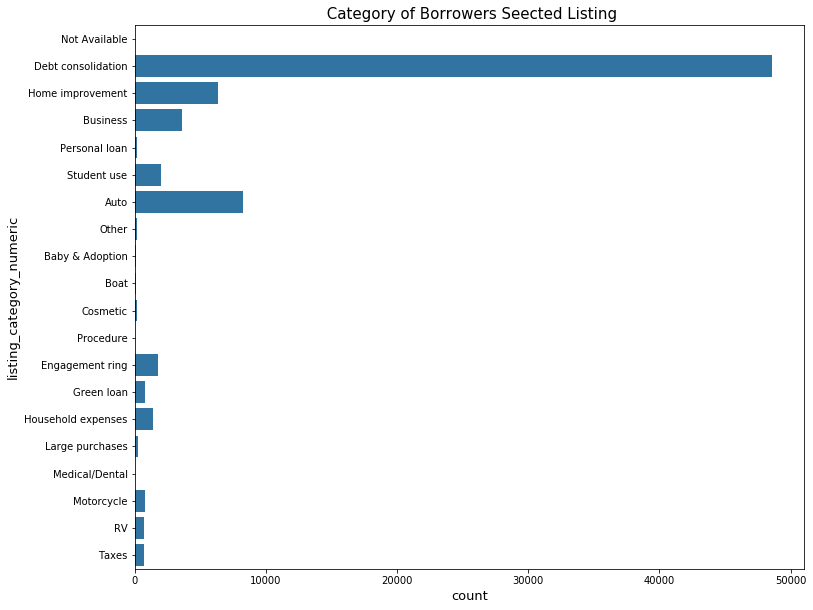

In [202]:
plt.figure(figsize = (12, 10)) 
plt.title(" Category of Borrowers Seected Listing", fontsize=15)
plt.ylabel('Category of Listing',fontsize=13)
plt.xlabel('Count of Applicatns' ,fontsize=13)
ax = sb.countplot(data = df_loan, y = 'listing_category_numeric', color = bar_color,
             )
plt.savefig(fname='visuals/listing_category.png', format='png')
ax.set(yticklabels = listing_labels);

> One importatn question we might like to answer is the count of borrowers in our home oswers in our dataset

> This question provides a lof of financial insight into the exposure of the company

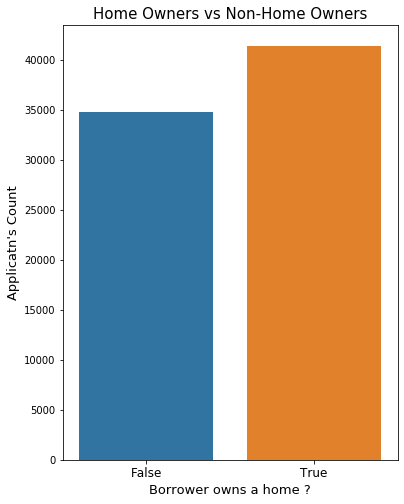

In [213]:
plt.subplots(figsize=(6,8))
plt.title("Home Owners vs Non-Home Owners", fontsize=15)
sb.countplot(df_loan.is_borrower_homeowner)
plt.ylabel('Applicatn\'s Count',fontsize=13)
plt.xlabel('Borrower owns a home ?' ,fontsize=13)
plt.xticks(fontsize=12)
plt.savefig(fname='visuals/home_owners.png', format='png')
plt.show()

> Plot Loan Status of Borrowers

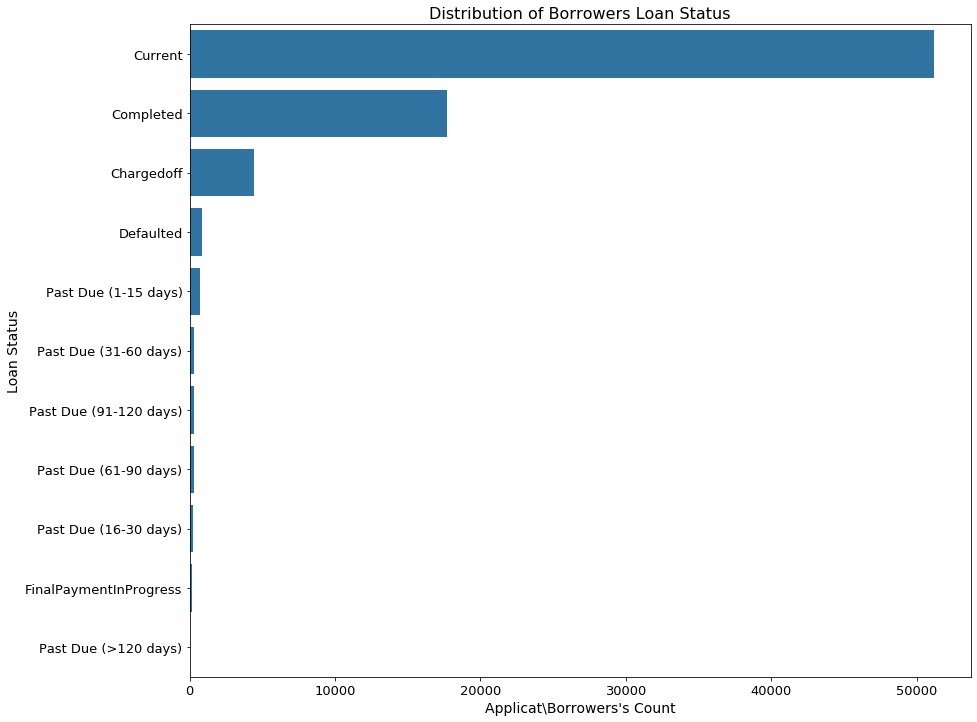

In [218]:
plt.figure(figsize = (14, 12)) 
sb.countplot(data = df_loan, y = 'loan_status', color = bar_color,
             order = df_loan.loan_status.value_counts().index);
plt.title('Distribution of Borrowers Loan Status', fontsize=16)
plt.xlabel('Applicat\Borrowers\'s Count',fontsize=14)
plt.ylabel('Loan Status' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/loan_status.png', format='png')
plt.show()

> PLot of Employment Status

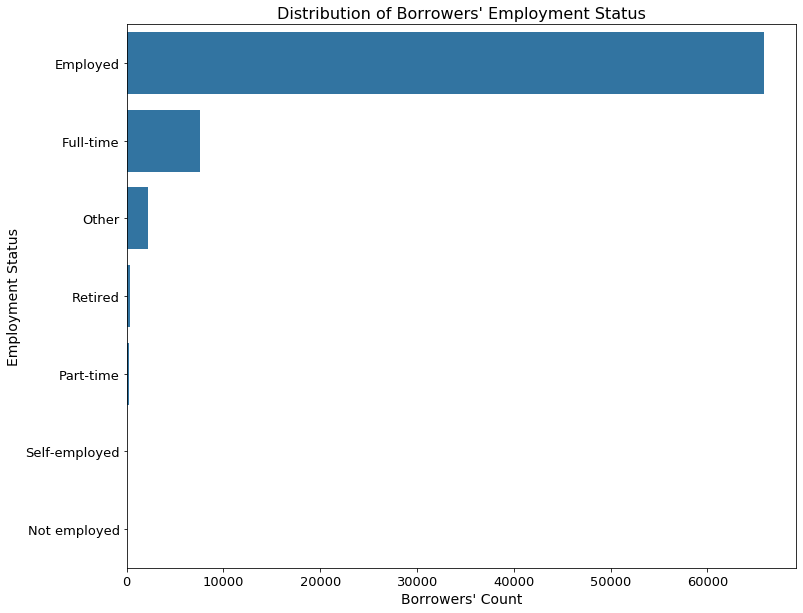

In [220]:
plt.figure(figsize = [12, 10]) 
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = df_loan, y = 'employment_status', color = bar_color,
             order = df_loan.employment_status.value_counts().index);
plt.title('Distribution of Borrowers\' Employment Status', fontsize=16)
plt.xlabel('Borrowers\' Count',fontsize=14)
plt.ylabel('Employment Status' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/employment_status.png', format='png')
plt.show()

> PLot of Borrowers' Top 5 State

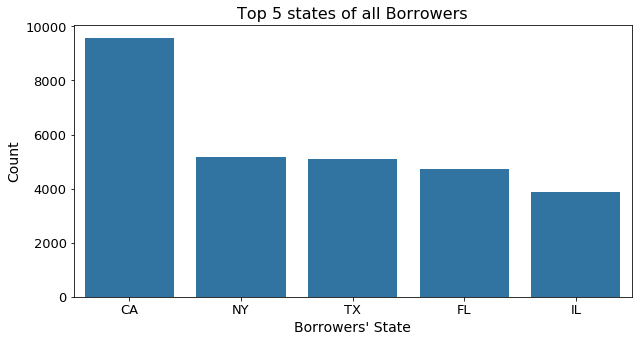

In [221]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df_loan, x = 'borrower_state', color = bar_color,
             order = df_loan.borrower_state.value_counts().head(5).index );
plt.title("Top 5 states of all Borrowers", fontsize=16)
plt.xlabel('Borrowers\' State',fontsize=14)
plt.ylabel('Count' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/borrowers_state.png', format='png')
plt.show()

> Plot top 10 Occupations of Borrowers

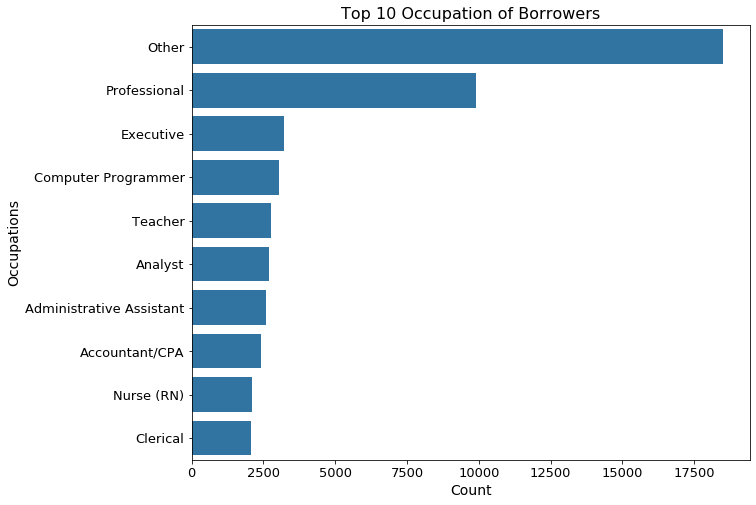

In [228]:
plt.figure(figsize = [10, 8]) 
sb.countplot(data = df_loan, y = 'occupation', color = bar_color,
             order = df_loan.occupation.value_counts().head(10).index );
plt.title("Top 10 Occupation of Borrowers",fontsize=16)
plt.xlabel('Count',fontsize=14)
plt.ylabel('Occupations' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/borrowers_occupation.png', format='png')
plt.show()

> Plot of Borrowers Credit Score
>> Note that these score are treated as categorical variables

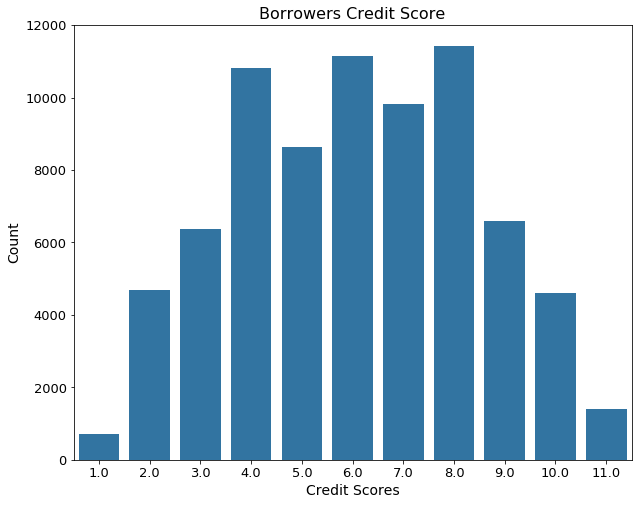

In [230]:
plt.figure(figsize = [10, 8]) 
sb.countplot(data = df_loan, x = 'prosper_score', color = bar_color);
plt.title("Borrowers Credit Score", fontsize=16)
plt.xlabel('Credit Scores',fontsize=14)
plt.ylabel('Count' ,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(fname='visuals/loan_credit_scores.png', format='png')
plt.show()

#### Key Insights & Summary of Univariate Analysis 

- most of the borrowers are employed into a job
- There are more current loan holders in the loan portfolio
- the largest percentage of borrowers have a prosper score rating of    8.0, 6.0 and 4.0
- most of the  borrowers do not have a known or reported occupation
- We have more borrowers from  CA(California) and NY(New York)
- borrowers who earn around `$25,000` are few while most of the borrowers earn between`$_50,000` `$74,999`
- most of th borrowers are home owners

#### Plotting Visuals for Quantitative Varibales

> Plot of Loan Rate Distribution

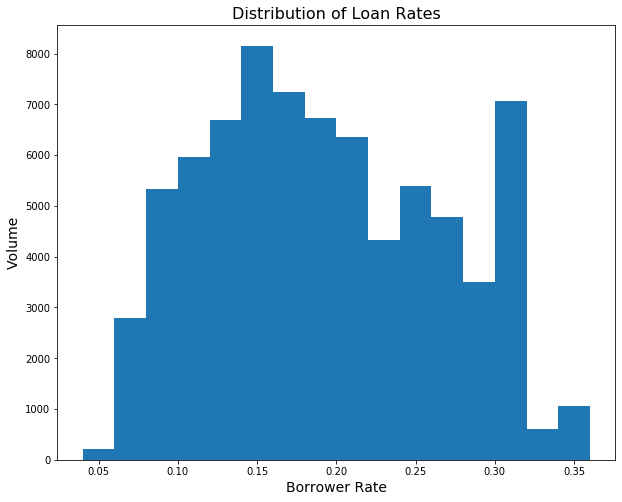

In [235]:
plt.figure(figsize=[10,8])
bin_edges = np.arange(df_loan.borrower_rate.min(), df_loan.borrower_rate.max()+.02,0.02)
plt.hist(data = df_loan, x = 'borrower_rate',bins=bin_edges);
plt.title("Distribution of Loan Rates", fontsize=16)
plt.xlabel('Borrower Rate',fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.savefig(fname='visuals/loa_rate_distro.png', format='png')
plt.show()

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!